# Prediction using unsupervised machine learning

In [4]:
# importing packages
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

In [8]:
# importing iris dataset 
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# show only the head of iris dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# check if there is any null values 
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# show information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### so data cleaning is not necessary as there is no null values or duplicated ones 

## Visualizing Iris dataset 

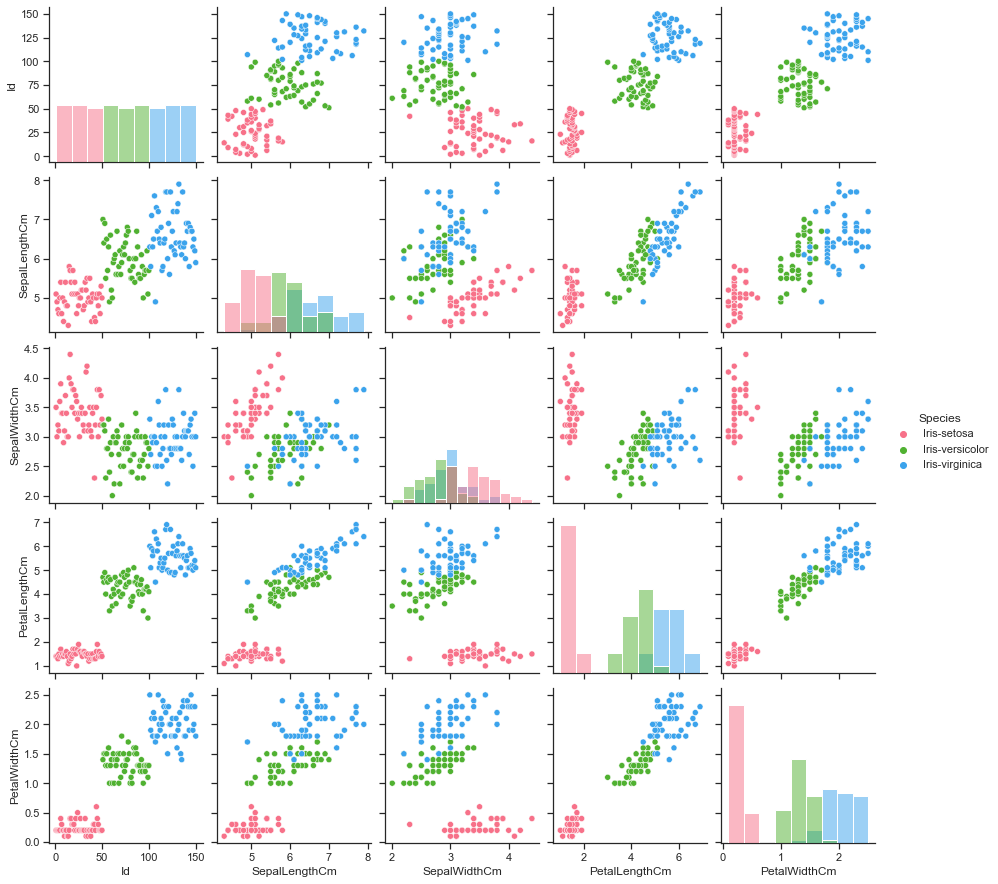

In [16]:
#Draw scatterplots for joint relationships and histograms for univariate distributions:
# plot the pairwise plot of multiple variables in a gride formate

sns.pairplot(df, hue = "Species", diag_kind = "hist", palette="husl")

# Clustring using K-Means:

In [25]:
# finding the optimium number of clusters for k-means
x = df.iloc[:, [0, 1, 2, 3]].values 

#Array to store "within clusster sum of squares" for all 10 values of k 
wcss = []

#taking number of clusters range from 1 : 11
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)    


C:\Users\Dell Latitude E5570\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## using the elbow method to determine the number of clusters for K-Means clustring 

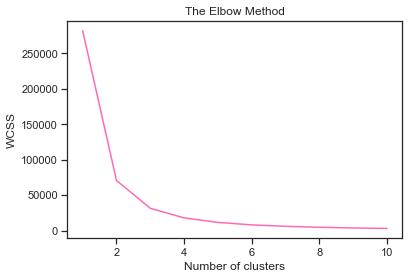

In [40]:
plt.plot(range(1, 11), wcss, marker ="", color = "hotpink")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #within cluster sum of squares 
plt.show()

In [33]:
# apply kmean clustring and creat kmean classifier 
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 100, n_init = 10, random_state = 0) 

# apply kmean classifier 
y_kmeans = kmeans.fit_predict(x)

# display cluster center
print(kmeans.cluster_centers_)


[[ 25.5     5.006   3.418   1.464]
 [125.5     6.588   2.974   5.552]
 [ 75.5     5.936   2.77    4.26 ]]


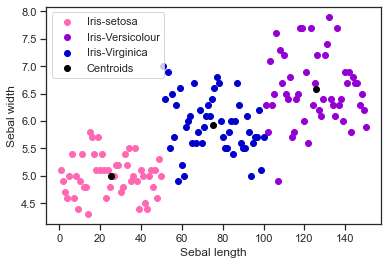

In [52]:
# visualizing the clusters on first 2 columns using scatter plot
plt.figure()
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = "hotpink", label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = "darkviolet", label = "Iris-Versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = "mediumblue", label = "Iris-Virginica")

# plotting the centroid of the cluster 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black", label = "Centroids")
plt.legend(loc = "upper left")
plt.xlabel("Sebal length")
plt.ylabel("Sebal width")
plt.show()

### thus, The predicted numbers of clusters are equal to the number of clusters found by visualizing the same data 